In [3]:
pip install openpyxl

   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   --------- ------------------------------ 61.4/251.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  245.8/251.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 251.3/251.3 kB 2.6 MB/s eta 0:00:00
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('heart_attack_prediction_dataset.xlsx')

In [23]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [5]:
df.shape

(8763, 26)

In [6]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [12]:
df['Blood Pressure'].dtype

dtype('O')

In [13]:
df['Heart Rate'].dtype

dtype('int64')

In [52]:
df['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [3]:
categorical_columns=df.select_dtypes(include=['object']).columns

In [5]:
categorical_columns


Index(['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent',
       'Hemisphere'],
      dtype='object')

In [21]:
df['Country'].value_counts().count()

20

In [19]:
df['Hemisphere'].value_counts()

Hemisphere
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: count, dtype: int64

In [23]:
df['Medication Use'].value_counts()

Medication Use
0    4396
1    4367
Name: count, dtype: int64

In [25]:
df['Sex'].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

In [30]:
df['Triglycerides'].values

array([286, 235, 587, ..., 527, 114, 180], dtype=int64)

In [6]:
# drop hemisphere, continent,country patient ID,Income
data=df.copy()

In [7]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [42]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [8]:
data.drop(columns=['Patient ID','Income','Hemisphere','Continent','Country'],inplace=True)

In [8]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [9]:

data.shape

(8763, 21)

In [10]:
data.select_dtypes(include=['object']).columns

Index(['Sex', 'Blood Pressure', 'Diet'], dtype='object')

In [11]:
data['Sex']=data['Sex'].replace({'Male':1,'Female':0})
data['Diet']=data['Diet'].replace({'Healthy':2,'Average':1,'Unhealthy':0})

C:\Users\lavya\AppData\Local\Temp\ipykernel_24504\3961763643.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex']=data['Sex'].replace({'Male':1,'Female':0})
C:\Users\lavya\AppData\Local\Temp\ipykernel_24504\3961763643.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diet']=data['Diet'].replace({'Healthy':2,'Average':1,'Unhealthy':0})


In [12]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,1,0,0,9,6.615001,31.251233,286,0,6,0
1,21,1,389,165/93,98,1,1,1,1,1,...,0,1,0,1,4.963459,27.194973,235,1,7,0
2,21,0,324,174/99,72,1,0,0,0,0,...,2,1,1,9,9.463426,28.176571,587,4,4,0
3,84,1,383,163/100,73,1,1,1,0,1,...,1,1,0,9,7.648981,36.464704,378,3,4,0
4,66,1,318,91/88,93,1,1,1,1,0,...,0,1,0,6,1.514821,21.809144,231,1,5,0


In [20]:
data['Diet'].value_counts()

Diet
2    2960
1    2912
0    2891
Name: count, dtype: int64

In [13]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

In [13]:
data['Systolic_BP'].head()

0    158
1    165
2    174
3    163
4     91
Name: Systolic_BP, dtype: int32

In [14]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,1,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,0,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,1,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,1,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,21.809144,231,1,5,0,91,88


In [15]:
data.drop(columns=['Blood Pressure'], inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [16]:
X=data.drop(columns=['Heart Attack Risk'])
y=data['Heart Attack Risk']

In [17]:
X.shape


(8763, 21)

In [18]:
y.shape

(8763,)

In [17]:
y.value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape

(7010, 21)

In [21]:
X_train

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP
5967,84,1,217,75,1,1,1,1,1,17.107142,...,0,1,10,1.737428,35.185856,544,3,6,125,83
8270,88,1,209,104,1,0,1,0,1,2.851698,...,1,0,1,11.876890,30.991599,649,2,4,131,72
100,90,1,224,98,1,0,1,0,1,3.560949,...,1,0,10,9.618701,22.851796,255,4,5,164,65
3410,27,1,376,65,0,0,1,0,1,19.035090,...,1,0,4,1.968503,37.513424,796,1,4,141,70
1790,55,1,270,94,0,1,1,1,1,0.968271,...,0,0,6,7.252388,23.269040,450,2,4,146,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,48,1,334,43,1,0,1,1,0,15.423465,...,1,1,5,2.091589,33.549888,549,4,4,94,82
5191,68,0,188,69,0,0,1,0,1,11.689453,...,1,0,1,0.923109,26.142883,410,2,9,116,70
5390,32,0,169,84,1,0,0,1,0,11.639443,...,0,1,9,5.730149,39.512660,777,4,9,156,79
860,85,0,285,54,1,1,1,1,1,11.070968,...,0,0,2,8.001822,25.499506,552,1,10,165,73


In [27]:
y_train.shape

(7010,)

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
k_values = range(1, 22)  # Try k from 1 to 21
cv_scores = []

for k in k_values:
    k_best = SelectKBest(score_func=f_classif, k=k)
    X_train_best = k_best.fit_transform(X_train, y_train)
    clf = RandomForestClassifier()
    scores = cross_val_score(clf, X_train_best, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the value of k with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 13


In [94]:
#we got the optimal number of features as 13

In [93]:
k_best = SelectKBest(score_func=f_classif, k=13)  # Select top 5 features

# Fit SelectKBest to the training data
X_train_best = k_best.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X.columns[k_best.get_support(indices=True)].tolist()

X_test_best = k_best.transform(X_test)

In [94]:
selected_features

['Age',
 'Cholesterol',
 'Diabetes',
 'Family History',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Diet',
 'Stress Level',
 'BMI',
 'Triglycerides',
 'Sleep Hours Per Day',
 'Systolic_BP']

In [98]:
scaler = StandardScaler()
X_train_best_scaled = scaler.fit_transform(X_train_best)
X_test_best_scaled=scaler.transform(X_test_best)

In [99]:
X_train_best_scaled

array([[ 1.42009072, -0.5344748 ,  0.73345432, ...,  0.57659349,
        -0.51879055, -0.37703014],
       [ 1.60835739, -0.63331388,  0.73345432, ...,  1.04683575,
        -1.52271651, -0.1493701 ],
       [ 1.70249073, -0.4479906 ,  0.73345432, ..., -0.71769236,
        -1.02075353,  1.10276012],
       ...,
       [-1.02737609, -1.12750929,  0.73345432, ...,  1.62008346,
         0.98709838,  0.7992134 ],
       [ 1.46715739,  0.30565739,  0.73345432, ...,  0.61242147,
         1.48906136,  1.14070346],
       [ 1.65542406, -0.25031244,  0.73345432, ...,  0.91248082,
        -0.01682757, -1.28767031]])

In [100]:
X_train_best_scaled.shape

(7010, 13)

In [101]:
X_test_best_scaled

array([[ 0.525824  ,  0.98517608, -1.36341142, ..., -0.4489825 ,
        -1.52271651, -0.41497348],
       [ 1.09062403,  1.24462866,  0.73345432, ...,  0.24966315,
        -0.51879055,  1.59602355],
       [ 0.76115734,  0.99753096,  0.73345432, ..., -1.39394552,
         0.48513541,  0.7992134 ],
       ...,
       [ 1.70249073, -1.01631532, -1.36341142, ..., -0.02352521,
        -1.02075353, -0.1493701 ],
       [ 0.10222397, -0.79392739,  0.73345432, ..., -1.08492917,
         0.98709838,  1.55808021],
       [-0.93324276,  0.94811142,  0.73345432, ...,  1.3468951 ,
        -1.52271651,  0.49566668]])

In [102]:
X_test_best_scaled.shape

(1753, 13)

In [103]:
#applying different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [104]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [105]:
for name, model in models.items():
    model.fit(X_train_best_scaled, y_train)

In [106]:
training_results = {}
for name, model in models.items():
    y_pred_train = model.predict(X_train_best_scaled)
    accuracy = accuracy_score(y_train, y_pred_train)
    training_results[name] = {'Accuracy': accuracy}

In [107]:
training_results_df = pd.DataFrame(training_results)

In [108]:
training_results_df

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine
Accuracy,0.641797,1.0,1.0,0.641797


In [109]:
testing_results = {}
for name, model in models.items():
    y_pred_test = model.predict(X_test_best_scaled)
    accuracy = accuracy_score(y_test, y_pred_test)
    testing_results[name] = {'Accuracy': accuracy}

In [110]:
testing_results_df = pd.DataFrame(testing_results)

In [111]:
testing_results_df

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine
Accuracy,0.641757,0.53223,0.634912,0.641757


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define a stratified k-fold cross-validator to preserve the percentage of samples for each class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [114]:
cv_results_train = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_best_scaled, y_train, cv=cv, scoring='accuracy')
    cv_results_train[name] = {
        'Mean Accuracy': np.mean(scores),
        'Standard Deviation': np.std(scores),
        'All Scores': scores
    }

In [115]:
cv_results_train_df = pd.DataFrame(cv_results_train).transpose()
cv_results_train_df

,Mean Accuracy,Standard Deviation,All Scores
Logistic Regression,0.641797,0.000285,"[0.6419400855920114, 0.6419400855920114, 0.641..."
Decision Tree,0.542225,0.012032,"[0.550641940085592, 0.5328102710413695, 0.5599..."
Random Forest,0.631098,0.004631,"[0.6269614835948645, 0.6326676176890157, 0.633..."
Support Vector Machine,0.641797,0.000285,"[0.6419400855920114, 0.6419400855920114, 0.641..."


In [116]:
cv_results_train_df['All Scores'][1]

C:\Users\lavya\AppData\Local\Temp\ipykernel_1544\2531707010.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cv_results_train_df['All Scores'][1]


array([0.55064194, 0.53281027, 0.55991441, 0.52639087, 0.54136947])

In [117]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

In [118]:
param_grid_lr = {
    'C': uniform(0.01, 10),
    'solver': ['lbfgs', 'liblinear']
}
random_search_lr = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_grid_lr, 
                                      n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
random_search_lr.fit(X_train_best_scaled, y_train)

best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_
print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best score for Logistic Regression: {best_score_lr}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'C': 6.172448639093615, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.6417974322396576


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [72]:
best_lr_model = LogisticRegression(C=1.274852719379398, solver='lbfgs')

# Train the model on the training data
best_lr_model.fit(X_train_best, y_train)

# Predict on the test data
y_pred_test = best_lr_model.predict(X_test_best)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, zero_division=1)
recall = recall_score(y_test, y_pred_test, zero_division=1)
f1 = f1_score(y_test, y_pred_test, zero_division=1)
roc_auc_lr = roc_auc_score(y_test, y_pred_test)

In [73]:
print("Logistic Regression Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc_lr}")

Logistic Regression Model Performance with Best Parameters:
Accuracy: 0.6417569880205363
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


In [68]:
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11)
}
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist_rf, 
                                      n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
random_search_rf.fit(X_train_best, y_train)
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best score for Random Forest: {best_score_rf}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 177}
Best score for Random Forest: 0.6417974322396576


In [69]:
best_rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=9, min_samples_split=11, n_estimators=177)

In [70]:
best_rf_model.fit(X_train_best, y_train)

# Predict on the test data for Random Forest
y_pred_test_rf = best_rf_model.predict(X_test_best)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_test_rf, zero_division=1)
f1_rf = f1_score(y_test, y_pred_test_rf, zero_division=1)
roc_auc_rf = roc_auc_score(y_test, y_pred_test_rf)

print("Random Forest Model Performance with Best Parameters:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC Score: {roc_auc_rf}")

Random Forest Model Performance with Best Parameters:
Accuracy: 0.6411865373645179
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.49955555555555553


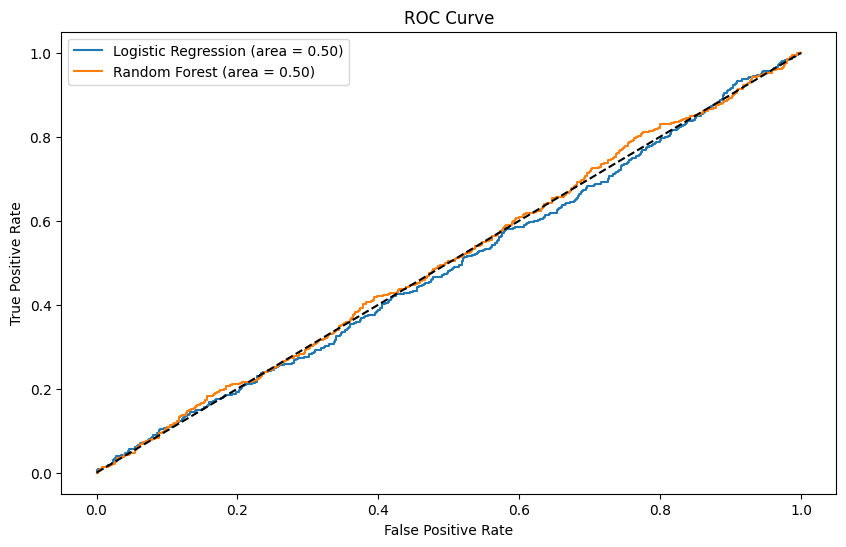

In [74]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test_best)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_best)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [120]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_best_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [122]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
history = model.fit(X_train_best_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1,callbacks=[early_stopping])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6499 - loss: 0.6477 - val_accuracy: 0.6448 - val_loss: 0.6507
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 0.6571 - val_accuracy: 0.6448 - val_loss: 0.6506
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6301 - loss: 0.6593 - val_accuracy: 0.6448 - val_loss: 0.6507
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.6634 - val_accuracy: 0.6448 - val_loss: 0.6507
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.6580 - val_accuracy: 0.6448 - val_loss: 0.6506
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - loss: 0.6518 - val_accuracy: 0.6448 - val_loss: 0.6506
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - loss: 0.6473 - val_accuracy: 0.6448 - val_loss: 0.6506
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6377 - loss: 0.6548 - val_accu

In [123]:
history.history

{'accuracy': [0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292,
  0.6410484910011292],
 'loss': [0.6528875231742859,
  0.6529467701911926,
  0.6528446078300476,
  0.6529566049575806,
  0.6529157757759094,
  0.6528673768043518,
  0.6528592109680176,
  0.6529013514518738,
  0.6528661847114563,
  0.6529132723808289,
  0.6528500318527222,
  0.6529028415679932],
 'val_accuracy': [0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431,
  0.6447931528091431],
 'val_loss': [0.6506602168083191,
  0.6506336331367493,
  0.6506641507148743,
  0.6506659984588623,
  0.6506398320198059,
  0.6506428122520447,
  0.6506351232528687,
  0